In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [1]:
# Build VGG model
def build_vgg(input_shape = (32, 32, 3), num_classes = 10):
    """Builds an VGG model.

    Args:
        input_shape: Tuple, the shape of the input tensor.
        num_classes: Int, number of output classes.

    Returns:
        A compiled VGG model.
    """
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = input_shape))
    model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))

    model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
    model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))

    model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
    model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))
    
    model.summary()
    
    return model

In [3]:
# Data preprocessing
def preprocess_data():
    """Loads and preprocesses the CIFAR-10 dataset.

    Returns:
        Tuple of preprocessed training and testing data.
    """
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Normalize images
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    return (x_train, y_train), (x_test, y_test)

In [4]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs = 10, batch_size = 64):
    """Trains and evaluates the model.

    Args:
        model: The VGG model to train.
        x_train: Training data.
        y_train: Training labels.
        x_test: Testing data.
        y_test: Testing labels.
        epochs: Number of training epochs.
        batch_size: Batch size for training.

    Returns:
        Training history object.
    """
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

    history = model.fit(x_train, y_train, validation_data = (x_test, y_test),
                        epochs = epochs, batch_size = batch_size)
    return history

In [5]:
def plot_training_results(history):
    """Plots training accuracy and loss curves.

    Args:
        history: Training history object from model.fit().
    """
    plt.figure(figsize = (12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label = 'Training Accuracy')
    plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label = 'Training Loss')
    plt.plot(history.history['val_loss'], label = 'Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

c:\Users\nguye\anaconda3\envs\ai\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,603,882 (6.12 MB)

 Trainable params: 1,603,882 (6.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 76ms/step - accuracy: 0.2550 - loss: 1.9433 - val_accuracy: 0.5339 - val_loss: 1.2948
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.5509 - loss: 1.2471 - val_accuracy: 0.6218 - val_loss: 1.0670
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.6503 - loss: 0.9977 - val_accuracy: 0.6877 - val_loss: 0.8980
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.7102 - loss: 0.8398 - val_accuracy: 0.7209 - val_loss: 0.8221
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.7451 - loss: 0.7324 - val_accuracy: 0.7430 - val_loss: 0.7497
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.7695 - loss: 0.6667 - val_accuracy: 0.7506 - val_loss: 0.7287
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.8025 - loss: 0.5805 - val_accuracy: 0.7536 - val_loss: 0.7456
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.8105 - loss: 0.5424 - 

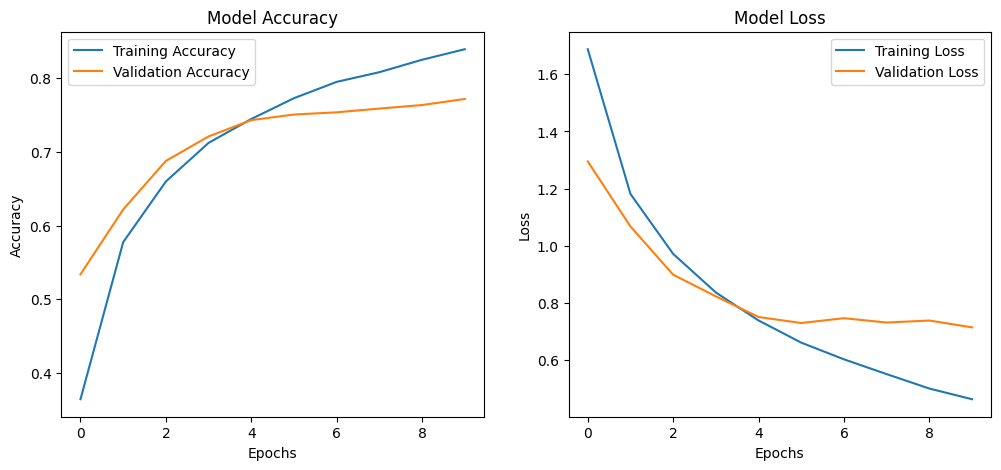

In [6]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = preprocess_data()
# Build model
vgg_model = build_vgg()
# Train and evaluate
history = train_and_evaluate(vgg_model, x_train, y_train, x_test, y_test)
# Plot results
plot_training_results(history)

Some variance:
- VGG-(11, 13, 16, 19)
- VGG-F (VGG-Feature)